# <center>Exploring Billboard's Hot 100 Year-End Charts (1960-2020) </center>

## Brief overview

What kind of songs and artists are there on the Billboard? Does popularity play a key role in being ranked on the Billboard charts, as claimed by Billboard themselves? What are some common characteristics of these songs? Any correlations between their characteristics? In this notebook, I will analyze my dataset that I collected and cleaned which contains Billboard's yearly rankings of the most popular songs from 1960-2020.

**About Billboard's Hot 100 Charts**

The Billboard Hot 100 Year-End Charts is a ranked list of songs for each year. Rankings are determined based on factors such as sales, amount of streams on music streaming services such as Spotify, and how frequently songs are played on radio stations. Each billboard chart year starts and ends around the month of December.

## Exploratory data analysis outline:

    1. Get a high level understanding of the data (shape, columns, data types, etc.)
    2. Comparisons of which artists and songs appear most often on Billboard charts
    3. Exploring popularity of songs and seeing if that has an influence on being ranked
    4. Looking at other characteristics (danceability, energy, etc.) of songs

# Part 1: Understanding the data

## The data

`spotify_complete.csv` contains every song that has appeared on the Billboard Hot 100 Year-end charts. It contains song information such as the artist(s), year appeared on Billboard, ranking, and audio features. The data was pulled on January 7, 2021.

Column | Definition
--- | ---
rank | ranking of the song on Billboard
title | the name of the song
artist | the main artist who performed the song
other artists | other artists who performed the song
year | year that the song has appeared on the Billboard chart
Spotify id | spotify ID of the song
Popularity | popularity of the song at the time when data was extracted
danceability | how suitable a song is for dancing
energy | measure of intensity and activity
key | overall key of the song
loudness | overall loudness in decibels
modality | modality of song (0 = Minor, 1 = Major)
speechiness | overall measure of spoken words
acousticness | measure of whether the song is acoustic
instrumentalness | measure of whether the song contains vocals
liveness | probability the song was performed live
valence | measure of musical positiveness
tempo | overall estimated speed or pace of song in beats per minute
duration | how long the song is in seconds
time_signature | overall time signature of a song

More information on Spotify's audio features: https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/

### Importing libraries that we will use:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the data
df = pd.read_csv('spotify_complete.csv', encoding='ISO-8859-1')
df.drop("Unnamed: 0", axis=1, inplace=True) # this is an index column that we already have

In [3]:
df.shape

(6098, 20)

In [4]:
df.head()

,rank,title,artist,other artists,year,Spotify id,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,time_signature
0,1,Theme from A Summer Place,Percy Faith,None,1960,6zwvB879PJSpTyFcg2wwnL,57,0.326,0.3260,0,-15.144,1,0.0297,0.591,0.918000,0.494,0.870,186.232,142.693,3
1,2,He'll Have to Go,Jim Reeves,None,1960,7dDE59NX0n466e705E8Itz,18,0.469,0.2440,1,-15.702,1,0.0357,0.974,0.016200,0.845,0.577,88.271,134.333,3
2,3,Cathy's Clown,The Everly Brothers,None,1960,1MA9StLzlFftLbuqOmoWij,52,0.498,0.5820,7,-8.961,1,0.0339,0.412,0.000000,0.372,0.866,119.809,144.013,4
3,4,Running Bear,Johnny Preston,None,1960,1RYznli2VNO7FCbW1Hq4KM,39,0.772,0.2970,5,-14.679,0,0.0530,0.854,0.000008,0.125,0.822,119.987,158.200,4
4,5,Teen Angel,Mark Dinning,None,1960,36NPEs4S7ik50NrlzaqoIJ,31,0.570,0.0636,0,-18.548,1,0.0459,0.936,0.000000,0.122,0.282,101.517,159.893,4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6098 entries, 0 to 6097
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rank              6098 non-null   int64  
 1   title             6098 non-null   object 
 2   artist            6098 non-null   object 
 3   other artists     6098 non-null   object 
 4   year              6098 non-null   int64  
 5   Spotify id        6098 non-null   object 
 6   Popularity        6098 non-null   int64  
 7   danceability      6098 non-null   float64
 8   energy            6098 non-null   float64
 9   key               6098 non-null   int64  
 10  loudness          6098 non-null   float64
 11  mode              6098 non-null   int64  
 12  speechiness       6098 non-null   float64
 13  acousticness      6098 non-null   float64
 14  instrumentalness  6098 non-null   float64
 15  liveness          6098 non-null   float64
 16  valence           6098 non-null   float64


In [6]:
df.describe()

,rank,year,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,time_signature
count,6098.000000,6098.000000,6098.000000,6098.000000,6098.000000,6098.000000,6098.000000,6098.000000,6098.000000,6098.000000,6098.000000,6098.000000,6098.000000,6098.000000,6098.000000,6098.000000
mean,50.491801,1989.998196,57.206789,0.627328,0.620230,5.290095,-8.403208,0.692358,0.072196,0.260426,0.028466,0.178272,0.604125,119.430655,231.916182,3.955395
std,28.869856,17.612298,17.275689,0.151422,0.190002,3.589750,3.545482,0.461555,0.077274,0.259243,0.128605,0.149371,0.239647,27.478116,63.693433,0.272839
min,1.000000,1960.000000,0.000000,0.000000,0.000020,0.000000,-26.113000,0.000000,0.000000,0.000024,0.000000,0.015000,0.000000,0.000000,29.688000,0.000000
25%,25.250000,1975.000000,47.000000,0.532000,0.484000,2.000000,-10.703750,0.000000,0.032200,0.043225,0.000000,0.085700,0.418000,98.942250,193.390250,4.000000
50%,50.000000,1990.000000,60.000000,0.642000,0.634000,5.000000,-7.817000,1.000000,0.041800,0.166000,0.000004,0.122000,0.623000,118.029000,228.000000,4.000000
75%,75.000000,2005.000000,70.000000,0.734000,0.770000,8.000000,-5.652250,1.000000,0.069300,0.418750,0.000341,0.226000,0.809000,134.185500,261.900250,4.000000
max,100.000000,2020.000000,100.000000,0.988000,0.997000,11.000000,-1.101000,1.000000,0.911000,0.991000,0.964000,0.991000,0.991000,233.429000,1561.133000,5.000000


# Part 2: Comparing frequency of songs and artists

**Which artists have appeared on the Billboard charts most often?**

In [7]:
# count number of unique, main artists
df['artist'].nunique()

2368

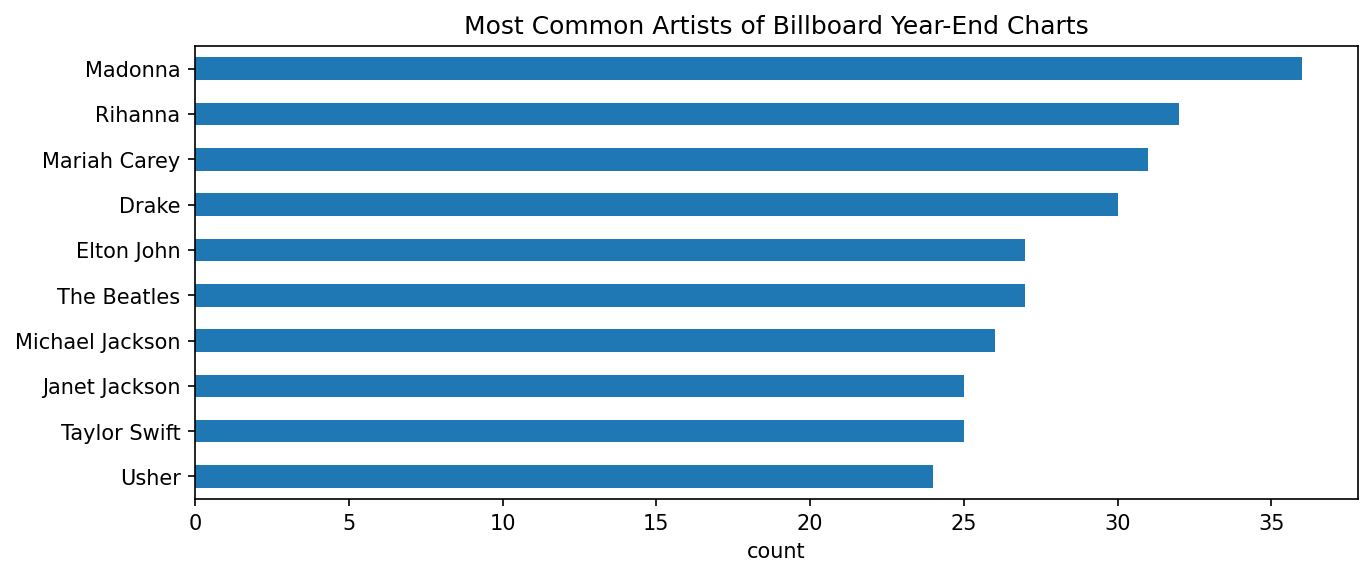

In [8]:
# horizontal bar chart of top 10 artists
plt.figure(figsize=(10,4),dpi=150)
plt.title("Most Common Artists of Billboard Year-End Charts")
plt.xlabel("count")

# sort by highest frequency
df['artist'].value_counts().nlargest(10).sort_values().plot(kind = 'barh')

# save image
plt.savefig('artists.png',dpi=200);

*It is important to note that these counts are based on the artists being the main artist of their respective song. It does not take into account that the artists could be featured in a song with other singers.*

Let's check what the highest ranking that these artists have ever obtained.

In [9]:
# create list of the most common artists
top_artists = ['Madonna','Rihanna','Mariah Carey','Drake','The Beatles',
               'Elton John','Michael Jackson','Janet Jackson','Taylor Swift','Usher']

# only extract rows in original dataframe that contains most common artists
top_artists_df = df[df['artist'].isin(top_artists)]

# grab highest ranking (minimum ranking in df) for each artist
top_artists_df.groupby(['artist'])['rank'].min().sort_values()

artist
Drake              1
Elton John         1
Mariah Carey       1
The Beatles        1
Usher              1
Madonna            2
Michael Jackson    2
Rihanna            2
Janet Jackson      3
Taylor Swift       5
Name: rank, dtype: int64

Half of these artists have achieved rank #1 in the history of Billboard Year-End charts. The other half are very close, having ranked at least top 5.

**How do songs that were performed solo compare to those performed by multiple artists?**

The next thing I want to take a look at is to observe the percentage of songs that were performed solo by a single artist versus the percentage of songs that were performed with multiple artists.

In [10]:
# counts number of songs that don't have other performing artists 
# (in other words, count songs with a single performer)
df[df['other artists'] != "None"]["other artists"].count()

1220

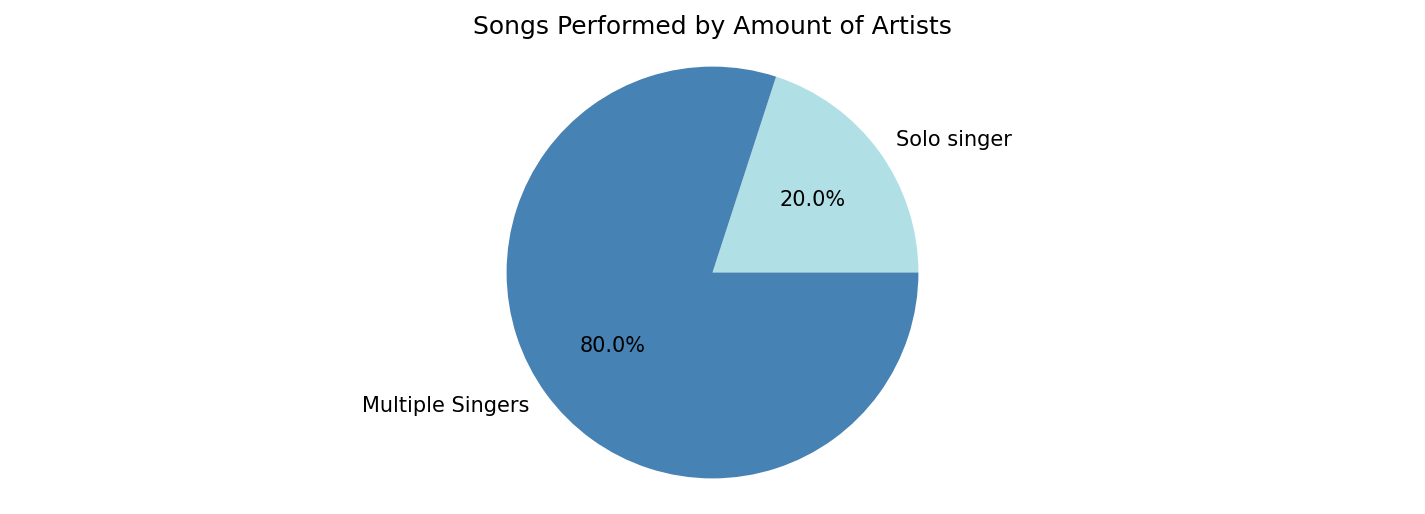

In [11]:
# percentage of songs performed by a single artist vs. multiple artists
solo_artist = (df[df['other artists'] != "None"]["other artists"].count() / df.shape[0])
multi_artist = (df[df['other artists'] == "None"]["other artists"].count() / df.shape[0])

# percentages, labels, and colors for pie chart
percentages = [solo_artist, multi_artist]
my_labels = 'Solo singer', 'Multiple Singers'
my_colors = ['powderblue','steelblue']

# plot pie chart with percentages rounded to 1 decimal point
plt.figure(figsize=(12,4),dpi=150)
plt.pie(percentages, labels=my_labels, autopct='%1.1f%%', colors=my_colors)
plt.title("Songs Performed by Amount of Artists")
plt.axis('equal');

Interestingly enough, the majority of the songs that appeared on the Billboard Year-End charts are those that were performed with multiple performers.

**Are there songs that have appeared most often on Billboard charts?**

In [12]:
# group by artist first as there may be songs with the same title and performed by different artists,
# then take the 10 most common songs
df.groupby(['artist','title']).size().nlargest(10)

artist               title                     
3 Doors Down         Here Without You              2
                     Kryptonite                    2
5 Seconds of Summer  Youngblood                    2
69 Boyz              Tootsee Roll                  2
98 Degrees           Because of You                2
Aaliyah              The One I Gave My Heart To    2
Ace of Base          All That She Wants            2
Adele                Hello                         2
                     Rolling in the Deep           2
Akon                 Smack That                    2
dtype: int64

Seems like the most amount of times that a song can occur on the Billboard Year-End charts is just 2. There isn't much else we can analyze from here, so let's move on.

# Part 3: Exploring the popularity field

**What are the most and least popular songs?**

In [13]:
# most popular songs
df[['title','artist','other artists','year','Popularity']].sort_values(by='Popularity', ascending=False).nlargest(10, 'Popularity')

,title,artist,other artists,year,Popularity
6044,Mood,24kGoldn,Iann Dior,2020,100
6064,All I Want for Christmas Is You,Mariah Carey,None,2020,99
5998,Blinding Lights,The Weeknd,None,2020,99
6002,Rockstar,DaBaby,Roddy Ricch,2020,95
6021,WAP,Cardi B,Megan Thee Stallion,2020,95
6035,Dynamite,BTS,None,2020,94
6046,For the Night,Pop Smoke,Lil Baby,2020,94
6017,Watermelon Sugar,Harry Styles,None,2020,94
6038,Laugh Now Cry Later,Drake,Lil Durk,2020,93
5924,Someone You Loved,Lewis Capaldi,None,2019,92


In [14]:
# least popular songs
df[['title','artist','other artists','year','Popularity']].sort_values(by='Popularity', ascending=False).nsmallest(10, 'Popularity')

,title,artist,other artists,year,Popularity
1697,Disco Duck,Rick Dees,His Cast of Idiots,1976,0
456,Baby I Need Your Loving,The Four Tops,None,1964,0
1158,Sweet City Woman,The Stampeders,None,1971,0
3566,This Lil' Game We Play,Subway,702,1995,0
538,The Jolly Green Giant,The Kingsmen,None,1965,0
3093,Whole Wide World,A'Me Lorain,None,1990,0
3994,Music of My Heart,'N Sync,Gloria Estefan,1999,0
3106,I Like the Way (The Kissing Game),Hi-Five,None,1991,0
2499,Careless Whisper,Wham!,None,1985,0
980,Tracy,The Cuff Links,None,1969,0


**How does popularity of songs change by year?**

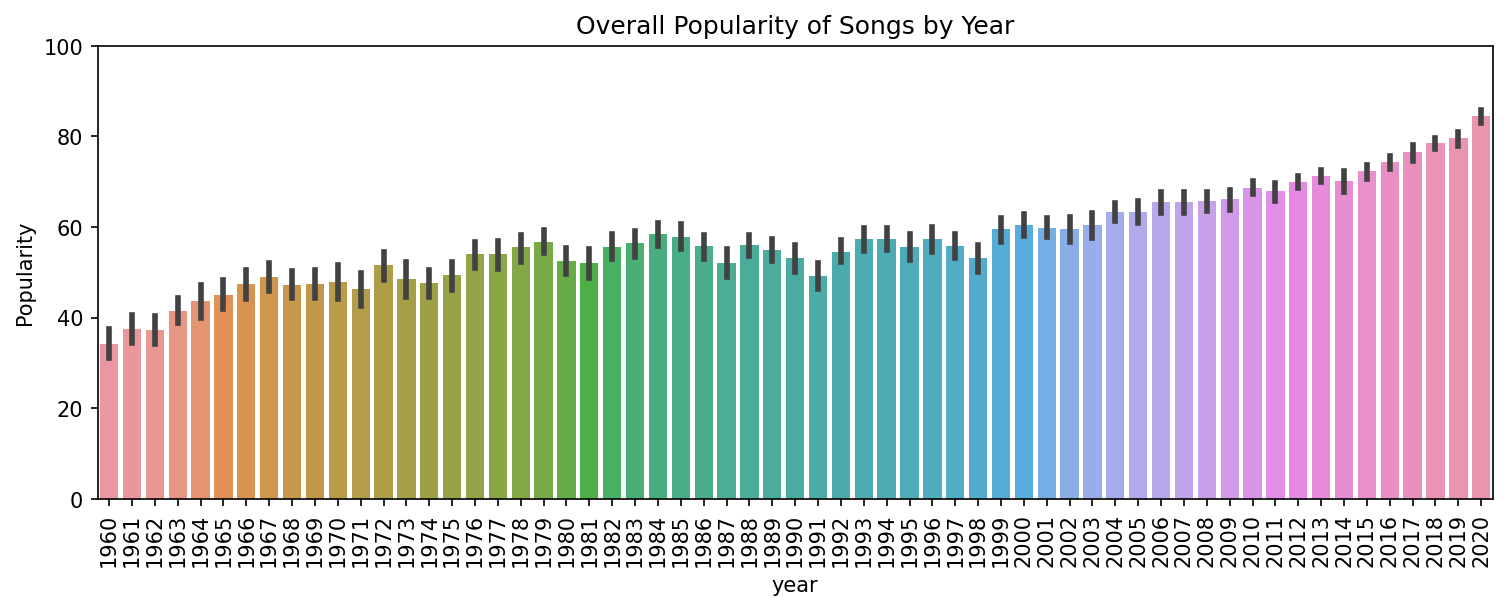

In [15]:
plt.figure(figsize=(12,4),dpi=150)
plt.title("Overall Popularity of Songs by Year")

# barplot of popularity by year
sns.barplot(data = df, x='year', y='Popularity')

# set y limits
plt.ylim(0,100)

# rotate labels on x-axis to be vertical
plt.xticks(rotation=90);

# save image
plt.savefig('popularity_year.png',dpi=200);

From the barplot above, we can see that songs generally get more popular as the year increases. 

**Key points to make:**

First, it looks like the most popular songs were those that appeared on the Billboard charts for 2020. This makes sense as the data was extracted around the time that Billboard released their 2020 Year-End chart, and the measure of the Popularity field is based on how popular the song was at the time the data was extracted.

Second, the least popular songs were those that appeared on older Billboard charts, mainly in years before 2000. Again, based on the date of when the data was extracted, we expect that older songs will not be as popular as newly released songs.

Since the data was extracted near 2020, we will focus on exploring the popularity of songs that appeared in the 2020 Year-End chart. We will then see if there how popularity is distributed among these songs.

**Does Billboard's 2020 Year-End chart really take into account of a song's popularity for rankings?**

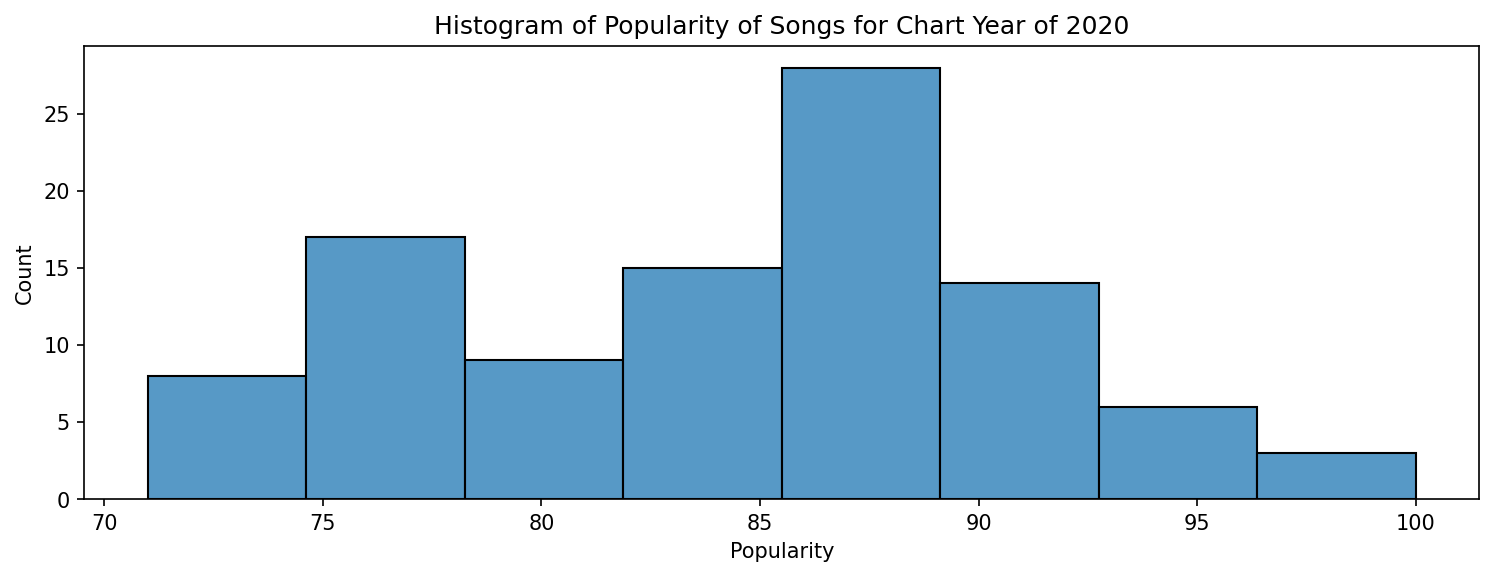

In [16]:
# Histogram of popularity of songs for chart year 2020
plt.figure(figsize=(12,4),dpi=150)
plt.title("Histogram of Popularity of Songs for Chart Year of 2020")

sns.histplot(data = df[df['year'] == 2020], x='Popularity');

A lot of these songs are quite popular! The lowest popularity score is only in the 70s. It may seem like Billboard really does take into account of a song's popularity for ranking songs that appear in their charts. Out of curiosity, let's see which songs were the most and least popular of 2020.

In [17]:
# most popular songs of 2020
df[df['year'] == 2020].sort_values('Popularity', ascending=False).head(10)[['rank','title','artist','Popularity']]

,rank,title,artist,Popularity
6044,47,Mood,24kGoldn,100
5998,1,Blinding Lights,The Weeknd,99
6064,67,All I Want for Christmas Is You,Mariah Carey,99
6002,5,Rockstar,DaBaby,95
6021,24,WAP,Cardi B,95
6017,20,Watermelon Sugar,Harry Styles,94
6046,49,For the Night,Pop Smoke,94
6035,38,Dynamite,BTS,94
6038,41,Laugh Now Cry Later,Drake,93
6040,43,Death Bed,Powfu,92


In [18]:
# least popular songs of 2020
df[df['year'] == 2020].sort_values('Popularity', ascending=False).tail(10)[['rank','title','artist','Popularity']]

,rank,title,artist,Popularity
6070,73,I Hope You're Happy Now,Carly Pearce,75
6095,98,Said Sum,Moneybagg Yo,75
6049,52,Nobody but You,Blake Shelton,74
6062,65,Die from a Broken Heart,Maddie,74
6066,69,Hard to Forget,Sam Hunt,74
6088,91,Bluebird,Miranda Lambert,73
6090,93,Does to Me,Luke Combs,73
6086,89,Homesick,Kane Brown,72
6067,70,One Margarita,Luke Bryan,72
6050,53,Trampoline,Shaed,71


**What is the correlation between ranking and popularity?**

One more thing I'd like to explore is if there is some association between the popularity of a song and the rank it gets on the Billboard charts. Since the popularity field is largely determined by when the data was pulled, it would make most sense to just limit our observation to the 2020 Year-End chart.

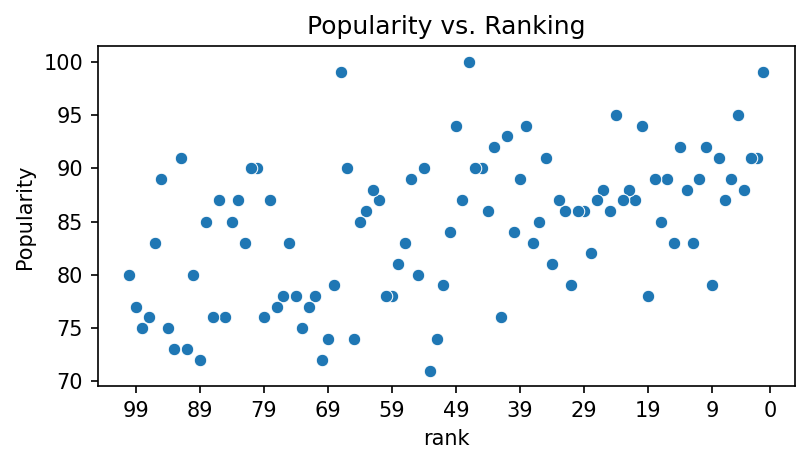

In [19]:
plt.figure(figsize=(6,3),dpi=150)
plt.title("Popularity vs. Ranking")

# scatterplot between rank and popularity for year 2020
sns.scatterplot(x=df['rank'],y='Popularity',data=df[df['year'] == 2020])

# set x-ticks so they don't get cluttered
plt.xticks([0,9,19,29,39,49,59,69,79,89,99])

# inverting the x-axis
plt.xlim(reversed(plt.xlim()));

In [20]:
# correlation coefficient between ranking and popularity
round(abs(df[df['year'] == 2020]['rank'].corr(df[df['year'] == 2020]['Popularity'])),2)

0.49

With a correlation coefficient of `r = 0.49`, there is a moderately strong relationship between the popularity of a song and how high it ranks on the Billboard Year-End charts. That is, the higher popularity a song is, the higher rank it is on the chart.

Popularity may more or less determine how high a song can rank, but keep in mind that Billboard has other factors that determine a song's ranking such as its sales and radioplay. I would say that popularity does have some role on affecting how high a song will rank on the chart.

# Part 4: Exploring the audio features

Let's explore the audio features of each Billboard song and see how they are distributed and if they have any correlations with other fields.

**How are audio features correlated with themselves and with year/rank?**

In [21]:
# create dataframe with only the audio feature fields
features_df = df.copy().iloc[:,7:]

# convert duration from seconds to minutes
features_df['duration'] = round(df['duration'] / 60,2)

features_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,time_signature
0,0.326,0.3260,0,-15.144,1,0.0297,0.591,0.918000,0.494,0.870,186.232,2.38,3
1,0.469,0.2440,1,-15.702,1,0.0357,0.974,0.016200,0.845,0.577,88.271,2.24,3
2,0.498,0.5820,7,-8.961,1,0.0339,0.412,0.000000,0.372,0.866,119.809,2.40,4
3,0.772,0.2970,5,-14.679,0,0.0530,0.854,0.000008,0.125,0.822,119.987,2.64,4
4,0.570,0.0636,0,-18.548,1,0.0459,0.936,0.000000,0.122,0.282,101.517,2.66,4


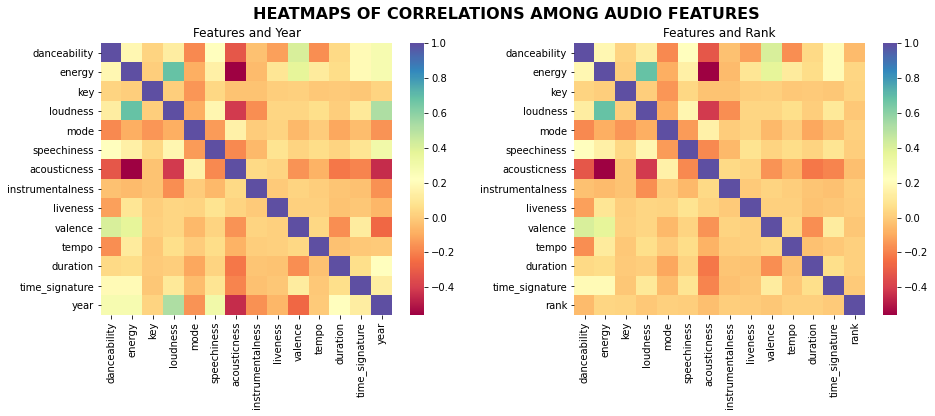

In [22]:
# setting up the subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
fig.subplots_adjust(wspace=0.3) # adjust width space between plots

# main title
fig.suptitle('HEATMAPS OF CORRELATIONS AMONG AUDIO FEATURES', fontsize=16, fontweight='bold')
axes[0].set_title('Features and Year')
axes[1].set_title('Features and Rank')


# create dataframes for audio features vs. year/ranking
year_features = pd.concat([features_df, df['year']], axis=1)
rank_features = pd.concat([features_df, df['rank']], axis=1)

# plotting heatmaps
sns.heatmap(ax=axes[0],data=year_features.corr(), cmap='Spectral')
sns.heatmap(ax=axes[1],data=rank_features.corr(), cmap='Spectral')

# save image
plt.savefig("heatmaps.png", dpi=200);

**Key takeaways from audio features versus other audio features:**
- Strongest correlations occur with energy vs. loudness, where songs with higher energy are generally associated with songs with higher loudness.
- Moderate correlations occur with valence vs. danceability, and valence vs. energy.
- All other correlations have weak correlations.

**Comparing audio features versus year:**
- The only features with (moderately) strong positive correlations with year are loudness, energy, and danceability. That is, as the year increases, music tends to be more loud, energetic, and have higher danceability to their songs.
- One feature, acousticness, seems to have the lowest correlation with year. As the year increases, songs somewhat tend to have less of an acoustic style to them.

**Comparing audio features versus rankings:**
- There are no correlations whatsoever between the features of a song versus ranking. It seems like the characteristics of songs have no affect on how they get ranked on the Billboard charts.

## Distribution of audio features

**What audio features are most common? How are they all distributed?**

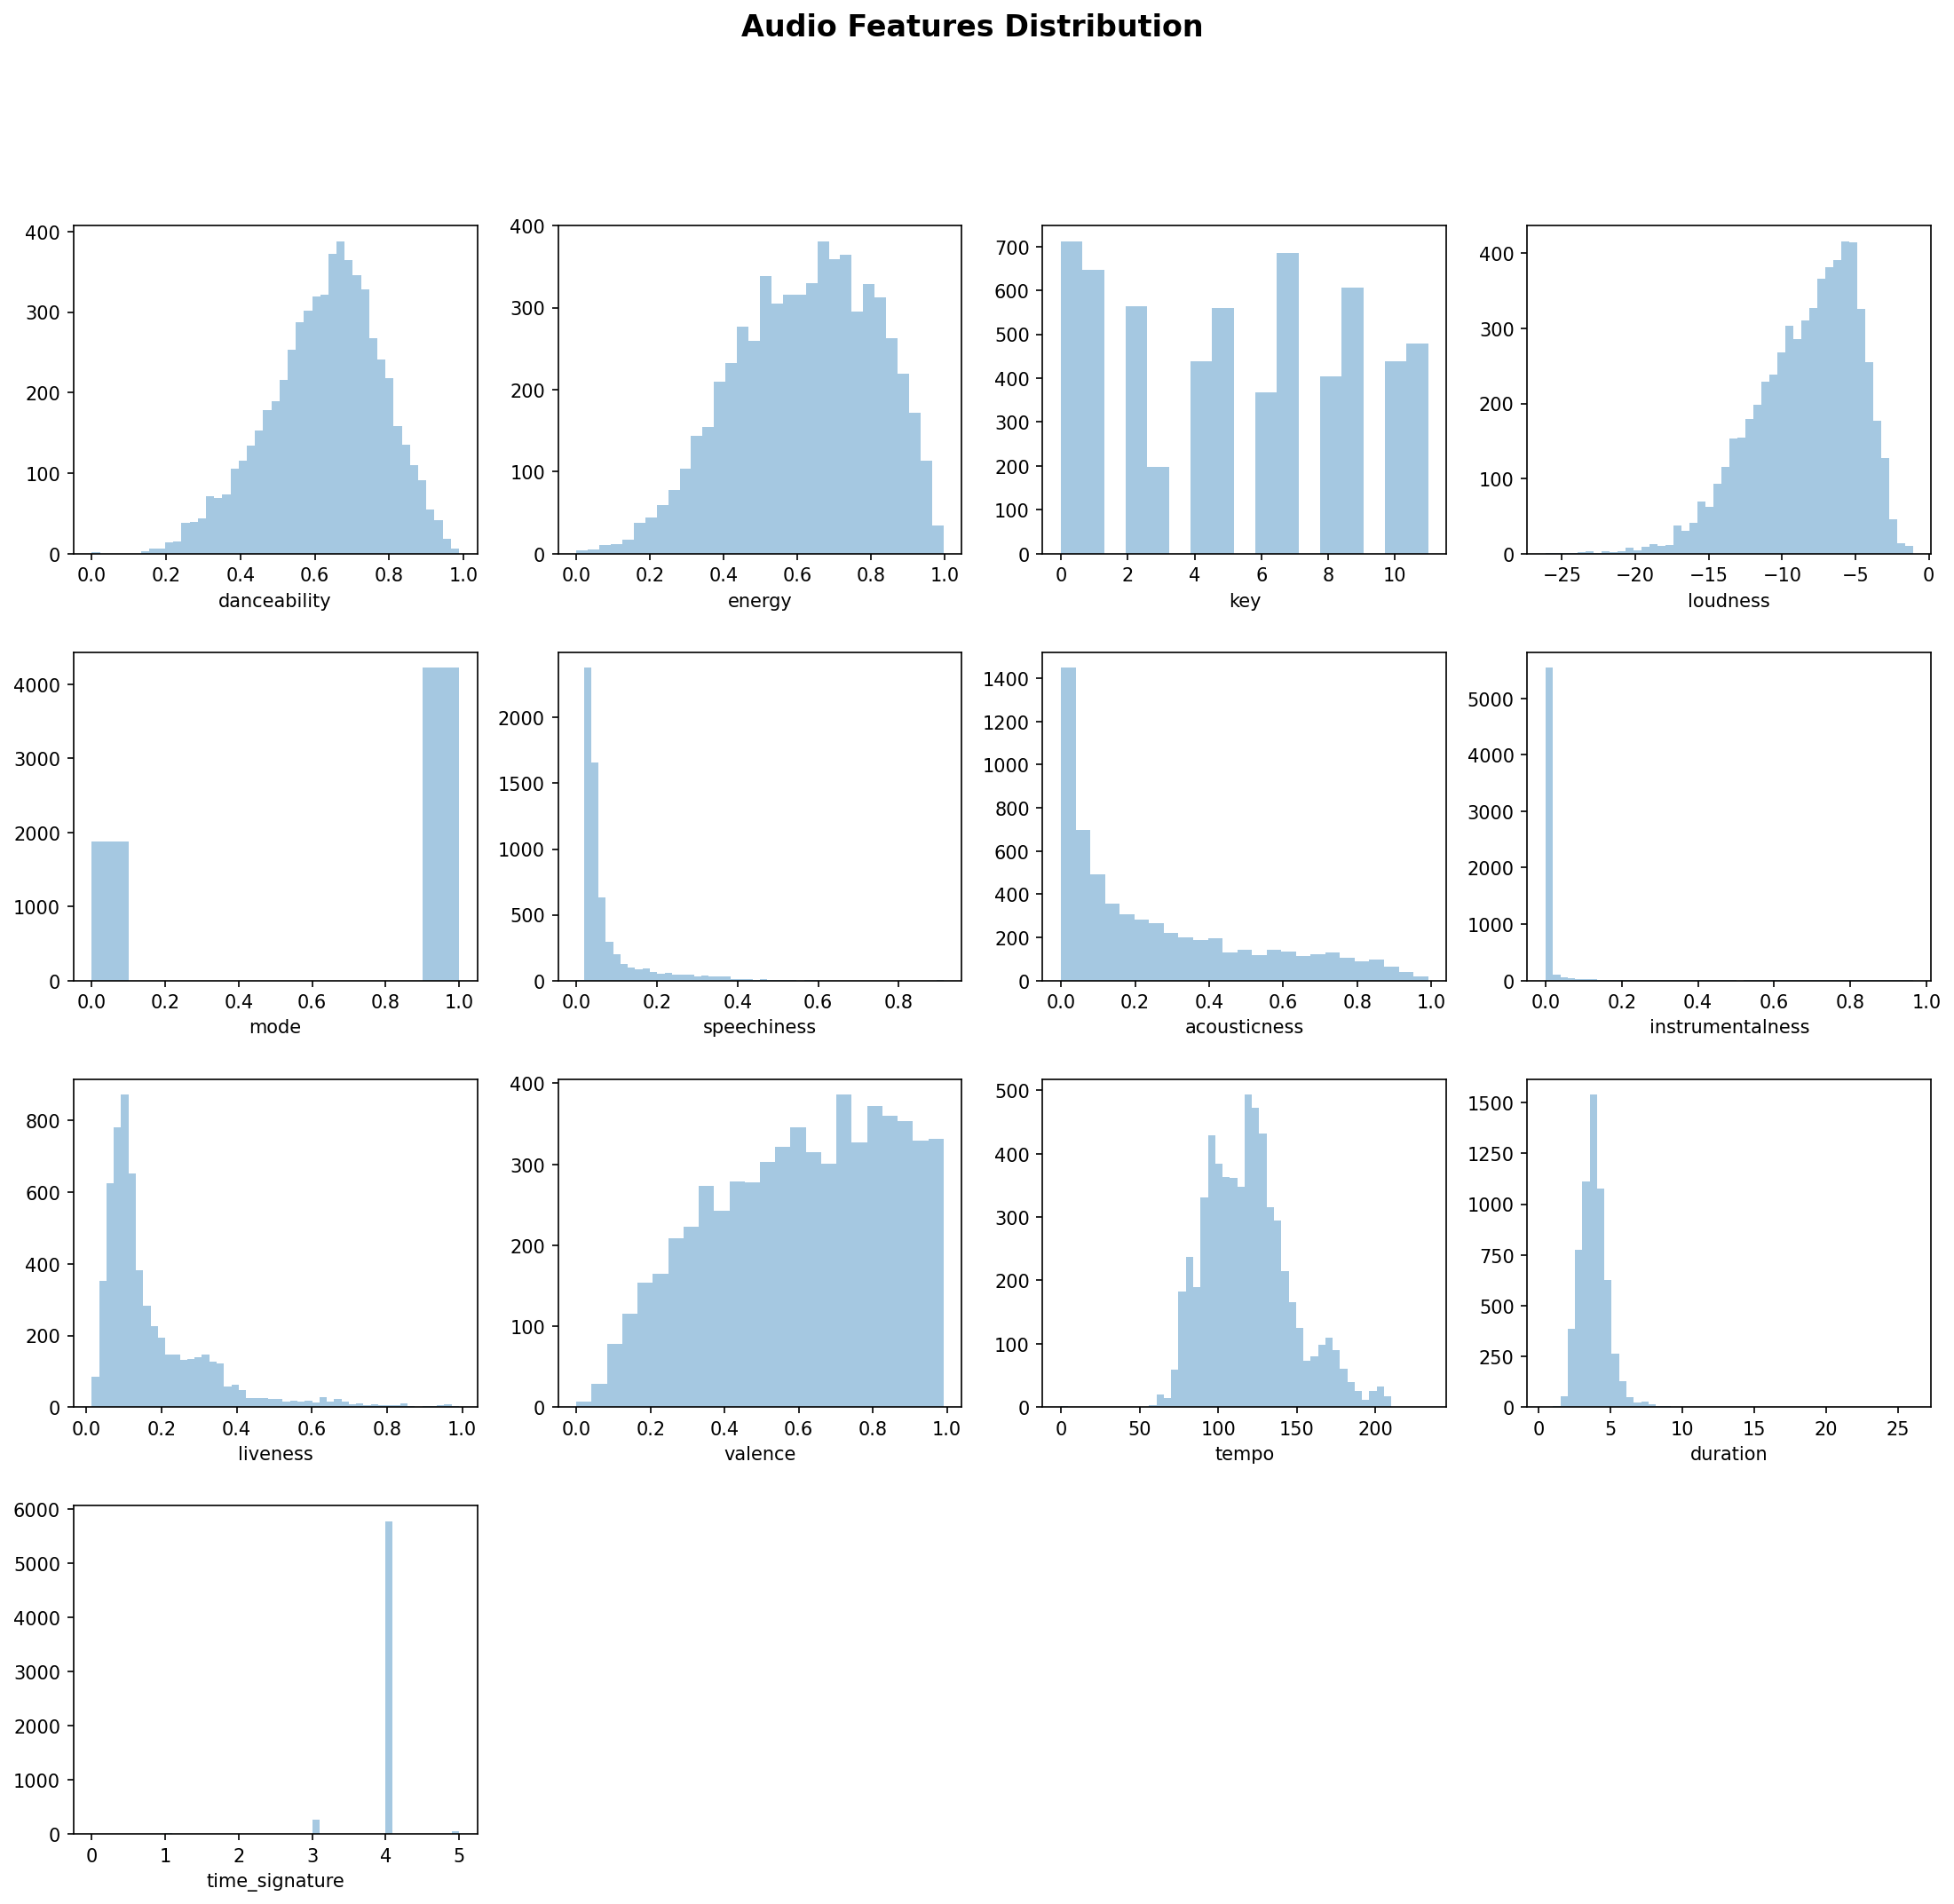

In [25]:
# amount of rows and columns for subplot matrix
rows = 4
columns = 4

# setting up the subplots
fig, axes = plt.subplots(nrows=rows, ncols=columns, figsize=(18, 16), dpi=150)
fig.subplots_adjust(hspace=0.3)
fig.suptitle("Audio Features Distribution",fontsize=16, fontweight='bold')

# used to refer to which field to graph
features_cols = list(features_df.columns)
column = 0

# hide subplots that don't contain graphs
axes[3,1].set_visible(False)
axes[3,2].set_visible(False)
axes[3,3].set_visible(False)

# iterate through each subplot and graph distribution plot
for i in range(rows):
    for j in range(columns):
        try:
            sns.distplot(features_df[features_cols[column]], ax=axes[i,j], kde=False)
            column += 1
        except:
            # if no more to graph, stop iteration
            break

**Key takeaways:**

- Danceability, energy, tempo, and loudness seems to be the most normally distributed features
- Most songs are played in a 4/4 time signature
- Songs on the Billboard charts tend to score low on its speechiness, liveness, and acousticness
- Almost all songs have a very low instrumentalness score, meaning most songs contain vocal tracks

# Conclusion

I was initially interested in seeing how Billboard chooses what songs to rank on their charts and what the characteristics of these songs were. After exploring the data, it seems that the most common artists were singers in the Pop genre, with singers like Madonna and Rihanna taking most of the spots in the Billboard charts. Most of the songs were performed with other singers rather than solo. 

Exploring the popularity of the songs was most intriguing to me as the analysis did seem to show that Billboard does tend to choose popular songs, as they claimed. I was also fascinated by looking at the characteristics of the songs. Newer released songs tend to be more popular than older songs. Newer songs are also generally louder, more energetic, and danceable than older songs, which really shows how music in general has changed over time.